In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn;seaborn.set()
from scipy.signal import argrelextrema
from datetime import datetime, timedelta
from random import shuffle
import DataBase
from threading import Thread
from multiprocessing import Manager, Pool
import time
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
# %matplotlib inline

In [3]:
stocks_data = pickle.load(open("FullData_5.p", "rb"))

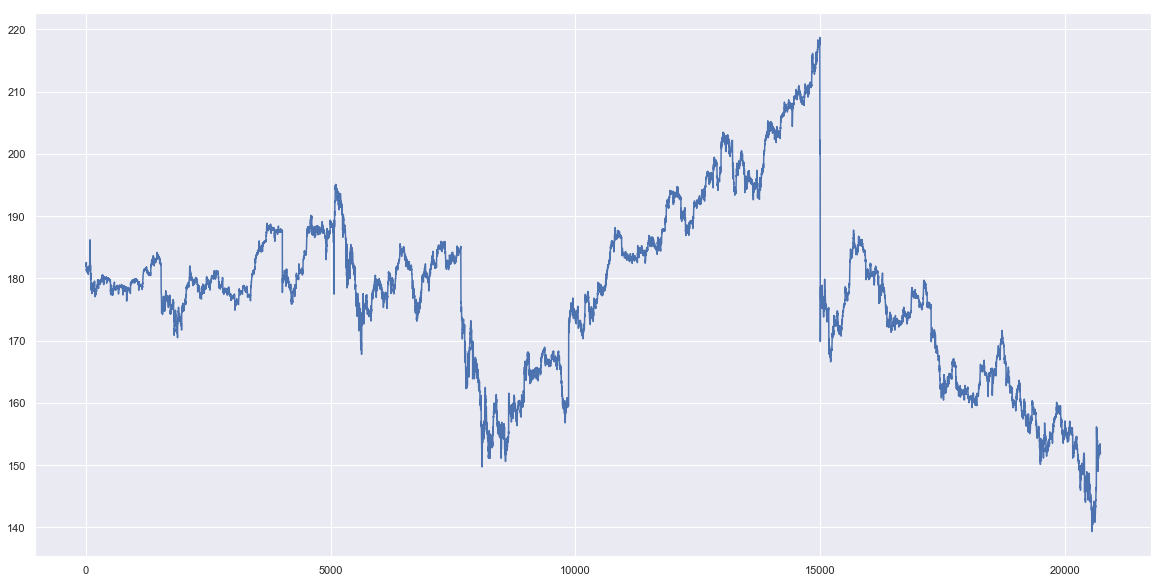

In [14]:
plt.figure(figsize=(20, 10))
plt.plot(stocks_data.loc[:, ['FB']].fillna(method='bfill').fillna(method='ffill').reset_index(drop=True))

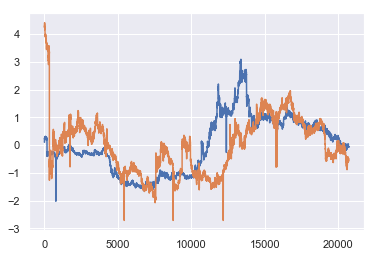

In [6]:
tickers = ['CLNE', 'TLGT']
plt.plot(StandardScaler().fit_transform(stocks_data.loc[:, tickers].fillna(method='bfill').fillna(method='ffill')))

In [8]:
correlated_stocks = pd.DataFrame(columns=['Stock A', 'Stock B'])
stocks_data_ds = stocks_data.loc[::6, :]
for ticker_a in range(len(stocks_data.columns)):
    print('{}/{}'.format(ticker_a, len(stocks_data.columns)))
    for ticker_b in range(ticker_a+1, len(stocks_data.columns)):
        ser_a = stocks_data_ds.iloc[:, ticker_a] - stocks_data_ds.iloc[:, ticker_a].mean()
        ser_b = stocks_data_ds.iloc[:, ticker_b] - stocks_data_ds.iloc[:, ticker_b].mean()
        num = (ser_a * ser_b).sum()
        den = ((ser_a ** 2).sum() * (ser_b ** 2).sum()) ** 0.5
        corr = num / den
        if corr > 0.9:         
            correlated_stocks = correlated_stocks.append(pd.DataFrame([[list(stocks_data.columns)[ticker_a], list(stocks_data.columns)[ticker_b]]], columns=['Stock A', 'Stock B']))


0/994


C:\Users\avialaret\PycharmProjects\AllianzDataset\venv\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


1/994


2/994


3/994


4/994


5/994


6/994


7/994


8/994


9/994


10/994


11/994


12/994


13/994


14/994


15/994


16/994


17/994


18/994


19/994


20/994


21/994


22/994


23/994


24/994


25/994


26/994


27/994


28/994


29/994


30/994


31/994


32/994


33/994


34/994


35/994


36/994


37/994


38/994


39/994


40/994


41/994


42/994


43/994


44/994


45/994


46/994


47/994


48/994


49/994


50/994


51/994


52/994


53/994


54/994


55/994


56/994


57/994


58/994


59/994


60/994


61/994


62/994


63/994


64/994


65/994


66/994


67/994


68/994


69/994


70/994


71/994


72/994


73/994


74/994


75/994


76/994


77/994


78/994


79/994


80/994


81/994


82/994


83/994


84/994


85/994


86/994


87/994


88/994


89/994


90/994


91/994


92/994


93/994


94/994


95/994


96/994


97/994


98/994


99/994


100/994


101/994


102/994


103/994


104/994


105/994


106/994


107/994


108/994


109/994


110/994


111/994


112/994


113/994


114/994


115/994


116/994


117/994


118/994


119/994


120/994


121/994


122/994


123/994


124/994


125/994


126/994


127/994


128/994


129/994


130/994


131/994


132/994


133/994


134/994


135/994


136/994


137/994


138/994


139/994


140/994


141/994


142/994


143/994


144/994


145/994


146/994


147/994


148/994


149/994


150/994


151/994


152/994


153/994


154/994


155/994


156/994


157/994


158/994


159/994


160/994


161/994


162/994


163/994


164/994


165/994


166/994


167/994


168/994


169/994


170/994


171/994


172/994


173/994


174/994


175/994


176/994


177/994


178/994


179/994


180/994


181/994


182/994


183/994


184/994


185/994


186/994


187/994


188/994


189/994


190/994


191/994


192/994


193/994


194/994


195/994


196/994


197/994


198/994


199/994


200/994


201/994


202/994


203/994


204/994


205/994


206/994


207/994


208/994


209/994


210/994


211/994


212/994


213/994


214/994


215/994


216/994


217/994


218/994


219/994


220/994


221/994


222/994


223/994


224/994


225/994


226/994


227/994


228/994


229/994


230/994


231/994


232/994


233/994


234/994


235/994


236/994


237/994


238/994


239/994


240/994


241/994


242/994


243/994


244/994


245/994


246/994


247/994


248/994


249/994


250/994


251/994


252/994


253/994


254/994


255/994


256/994


257/994


258/994


259/994


260/994


261/994


262/994


263/994


264/994


265/994


266/994


267/994


268/994


269/994


270/994


271/994


272/994


273/994


274/994


275/994


276/994


277/994


278/994


279/994


280/994


281/994


282/994


283/994


284/994


285/994


286/994


287/994


288/994


289/994


290/994


291/994


292/994


293/994


294/994


295/994


296/994


297/994


298/994


299/994


300/994


301/994


302/994


303/994


304/994


305/994


306/994


307/994


308/994


309/994


310/994


311/994


312/994


313/994


314/994


315/994


316/994


317/994


318/994


319/994


320/994


321/994


322/994


323/994


324/994


325/994


326/994


327/994


328/994


329/994


330/994


331/994


332/994


333/994


334/994


335/994


336/994


337/994


338/994


339/994


340/994


341/994


342/994


343/994


344/994


345/994


346/994


347/994


348/994


349/994


350/994


351/994


352/994


353/994


354/994


355/994


356/994


357/994


358/994


359/994


360/994


361/994


362/994


363/994


364/994


365/994


366/994


367/994


368/994


369/994


370/994


371/994


372/994


373/994


374/994


375/994


376/994


377/994


378/994


379/994


380/994


381/994


382/994


383/994


384/994


385/994


386/994


387/994


388/994


389/994


390/994


391/994


392/994


393/994


394/994


395/994


396/994


397/994


398/994


399/994


400/994


401/994


402/994


403/994


404/994


405/994


406/994


407/994


408/994


409/994


410/994


411/994


412/994


413/994


414/994


415/994


416/994


417/994


418/994


419/994


420/994


421/994


422/994


423/994


424/994


425/994


426/994


427/994


428/994


429/994


430/994


431/994


432/994


433/994


434/994


435/994


436/994


437/994


438/994


439/994


440/994


441/994


442/994


443/994


444/994


445/994


446/994


447/994


448/994


449/994


450/994


451/994


452/994


453/994


454/994


455/994


456/994


457/994


458/994


459/994


460/994


461/994


462/994


463/994


464/994


465/994


466/994


467/994


468/994


469/994


470/994


471/994


472/994


473/994


474/994


475/994


476/994


477/994


478/994


479/994


480/994


481/994


482/994


483/994


484/994


485/994


486/994


487/994


488/994


489/994


490/994


491/994


492/994


493/994


494/994


495/994


496/994


497/994


498/994


499/994


500/994


501/994


502/994


503/994


504/994


505/994


506/994


507/994


508/994


509/994


510/994


511/994


512/994


513/994


514/994


515/994


516/994


517/994


518/994


519/994


520/994


521/994


522/994


523/994


524/994


525/994


526/994


527/994


528/994


529/994


530/994


531/994


532/994


533/994


534/994


535/994


536/994


537/994


538/994


539/994


540/994


541/994


542/994


543/994


544/994


545/994


546/994


547/994


548/994


549/994


550/994


551/994


552/994


553/994


554/994


555/994


556/994


557/994


558/994


559/994


560/994


561/994


562/994


563/994


564/994


565/994


566/994


567/994


568/994


569/994


570/994


571/994


572/994


573/994


574/994


575/994


576/994


577/994


578/994


579/994


580/994


581/994


582/994


583/994


584/994


585/994


586/994


587/994


588/994


589/994


590/994


591/994


592/994


593/994


594/994


595/994


596/994


597/994


598/994


599/994


600/994


601/994


602/994


603/994


604/994


605/994


606/994


607/994


608/994


609/994


610/994


611/994


612/994


613/994


614/994


615/994


616/994


617/994


618/994


619/994


620/994


621/994


622/994


623/994


624/994


625/994


626/994


627/994


628/994


629/994


630/994


631/994


632/994


633/994


634/994


635/994


636/994


637/994


638/994


639/994


640/994


641/994


642/994


643/994


644/994


645/994


646/994


647/994


648/994


649/994


650/994


651/994


652/994


653/994


654/994


655/994


656/994


657/994


658/994


659/994


660/994


661/994


662/994


663/994


664/994


665/994


666/994


667/994


668/994


669/994


670/994


671/994


672/994


673/994


674/994


675/994


676/994


677/994


678/994


679/994


680/994


681/994


682/994


683/994


684/994


685/994


686/994


687/994


688/994


689/994


690/994


691/994


692/994


693/994


694/994


695/994


696/994


697/994


698/994


699/994


700/994


701/994


702/994


703/994


704/994


705/994


706/994


707/994


708/994


709/994


710/994


711/994


712/994


713/994


714/994


715/994


716/994


717/994


718/994


719/994


720/994


721/994


722/994


723/994


724/994


725/994


726/994


727/994


728/994


729/994


730/994


731/994


732/994


733/994


734/994


735/994


736/994


737/994


738/994


739/994


740/994


741/994


742/994


743/994


744/994


745/994


746/994


747/994


748/994


749/994


750/994


751/994


752/994


753/994


754/994


755/994


756/994


757/994


758/994


759/994


760/994


761/994


762/994


763/994


764/994


765/994


766/994


767/994


768/994


769/994


770/994


771/994


772/994


773/994


774/994


775/994


776/994


777/994


778/994


779/994


780/994


781/994


782/994


783/994


784/994


785/994


786/994


787/994


788/994
789/994


790/994
791/994


792/994


793/994


794/994


795/994
796/994


797/994
798/994


799/994
800/994


801/994
802/994


803/994
804/994


805/994
806/994


807/994


808/994


809/994


810/994
811/994


812/994
813/994


814/994
815/994


816/994
817/994


818/994


819/994


820/994


821/994


822/994
823/994


824/994
825/994


826/994
827/994


828/994
829/994


830/994


831/994
832/994


833/994
834/994


835/994


836/994


837/994


838/994


839/994


840/994


841/994
842/994

843/994
844/994


845/994


846/994


847/994


848/994


849/994


850/994


851/994


852/994


853/994
854/994


855/994
856/994


857/994
858/994


859/994
860/994


861/994
862/994


863/994
864/994


865/994
866/994


867/994
868/994


869/994
870/994


871/994
872/994


873/994
874/994


875/994
876/994


877/994
878/994


879/994
880/994


881/994
882/994


883/994
884/994
885/994


886/994
887/994


888/994
889/994
890/994


891/994
892/994
893/994


894/994
895/994
896/994


897/994
898/994
899/994


900/994
901/994
902/994


903/994
904/994


905/994
906/994


907/994
908/994


909/994
910/994
911/994


912/994
913/994
914/994


915/994
916/994
917/994


918/994
919/994
920/994


921/994
922/994
923/994


924/994
925/994
926/994


927/994
928/994
929/994


930/994
931/994
932/994
933/994


934/994
935/994
936/994


937/994
938/994
939/994


940/994
941/994
942/994


943/994
944/994
945/994
946/994


947/994
948/994
949/994
950/994
951/994


952/994
953/994
954/994
955/994
956/994


957/994
958/994
959/994
960/994
961/994
962/994


963/994
964/994
965/994
966/994
967/994
968/994
969/994
970/994


971/994
972/994
973/994
974/994
975/994
976/994
977/994
978/994
979/994
980/994


981/994
982/994
983/994
984/994
985/994
986/994
987/994
988/994
989/994
990/994
991/994
992/994
993/994


In [11]:
# correlated_stocks = pickle.load(open('correlated_stocks.p', 'rb'))
print(correlated_stocks.tail())
pickle.dump(correlated_stocks, open('correlated_stocks.p', 'wb'))

  Stock A Stock B
0    VRSK    ZBRA
0    VRSN    VSTM
0    VRSN     WIX
0     WIX    ZBRA
0      ZG       Z


(0.7582186751904494, -5.15735053652543)

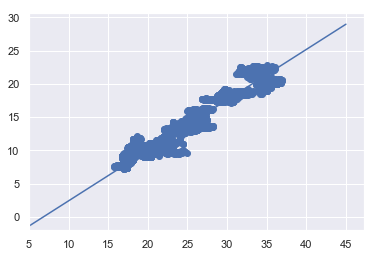

In [5]:
X = stocks_data.loc[:, tickers[0]].fillna(method='bfill').fillna(method='ffill')
Y = stocks_data.loc[:, tickers[1]].fillna(method='bfill').fillna(method='ffill')

Xsm = sm.add_constant(X.values)
model = sm.OLS(Y.values, Xsm)
intercept, gamma = model.fit().params

plt.scatter(X, Y)
x = pd.Series(range(int(max(X) + 10)))
plt.plot(gamma * x + intercept)
plt.xlim(left=int(min(X) - 10))
plt.ylim(bottom=int(min(Y) - 10))

gamma, intercept

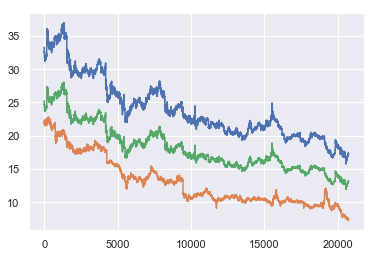

In [6]:
plt.plot(stocks_data.loc[:, tickers].fillna(method='bfill').fillna(method='ffill').reset_index(drop=True))
plt.plot(X.reset_index(drop=True) * gamma)

In [31]:
mu = (Y - X * gamma).mean()
residual = (Y - X * gamma) - mu

In [35]:
adfuller(residual)[0]

-3.2709610016121653

In [14]:
len(correlated_stocks)

2704

In [15]:
adf_scores = pd.DataFrame(columns=['Stock A', 'Stock B', 'Score'])
i = 0
for pair in correlated_stocks.iterrows():
    print(i)
    i += 1
    stock_a = pair[1].loc['Stock A']
    stock_b = pair[1].loc['Stock B']
    X = stocks_data.loc[:, stock_a].fillna(method='bfill').fillna(method='ffill')
    Y = stocks_data.loc[:, stock_b].fillna(method='bfill').fillna(method='ffill')
    Xsm = sm.add_constant(X.values)
    model = sm.OLS(Y.values, Xsm)
    intercept, gamma = model.fit().params
    mu = (Y - X * gamma).mean()
    residual = (Y - X * gamma) - mu
    adf = adfuller(residual)[0]
    adf_scores = adf_scores.append(pd.DataFrame([[stock_a, stock_b, adf]], columns=['Stock A', 'Stock B', 'Score']))


0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


30


31


32


33


34


35


36


37


38


39


40


41


42


43


44


45


46


47


48


49


50


51


52


53


54


55


56


57


58


59


60


61


62


63


64


65


66


67


68


69


70


71


72


73


74


75


76


77


78


79


80


81


82


83


84


85


86


87


88


89


90


91


92


93


94


95


96


97


98


99


100


101


102


103


104


105


106


107


108


109


110


111


112


113


114


115


116


117


118


119


120


121


122


123


124


125


126


127


128


129


130


131


132


133


134


135


136


137


138


139


140


141


142


143


144


145


146


147


148


149


150


151


152


153


154


155


156


157


158


159


160


161


162


163


164


165


166


167


168


169


170


171


172


173


174


175


176


177


178


179


180


181


182


183


184


185


186


187


188


189


190


191


192


193


194


195


196


197


198


199


200


201


202


203


204


205


206


207


208


209


210


211


212


213


214


215


216


217


218


219


220


221


222


223


224


225


226


227


228


229


230


231


232


233


234


235


236


237


238


239


240


241


242


243


244


245


246


247


248


249


250


251


252


253


254


255


256


257


258


259


260


261


262


263


264


265


266


267


268


269


270


271


272


273


274


275


276


277


278


279


280


281


282


283


284


285


286


287


288


289


290


291


292


293


294


295


296


297


298


299


300


301


302


303


304


305


306


307


308


309


310


311


312


313


314


315


316


317


318


319


320


321


322


323


324


325


326


327


328


329


330


331


332


333


334


335


336


337


338


339


340


341


342


343


344


345


346


347


348


349


350


351


352


353


354


355


356


357


358


359


360


361


362


363


364


365


366


367


368


369


370


371


372


373


374


375


376


377


378


379


380


381


382


383


384


385


386


387


388


389


390


391


392


393


394


395


396


397


398


399


400


401


402


403


404


405


406


407


408


409


410


411


412


413


414


415


416


417


418


419


420


421


422


423


424


425


426


427


428


429


430


431


432


433


434


435


436


437


438


439


440


441


442


443


444


445


446


447


448


449


450


451


452


453


454


455


456


457


458


459


460


461


462


463


464


465


466


467


468


469


470


471


472


473


474


475


476


477


478


479


480


481


482


483


484


485


486


487


488


489


490


491


492


493


494


495


496


497


498


499


500


501


502


503


504


505


506


507


508


509


510


511


512


513


514


515


516


517


518


519


520


521


522


523


524


525


526


527


528


529


530


531


532


533


534


535


536


537


538


539


540


541


542


543


544


545


546


547


548


549


550


551


552


553


554


555


556


557


558


559


560


561


562


563


564


565


566


567


568


569


570


571


572


573


574


575


576


577


578


579


580


581


582


583


584


585


586


587


588


589


590


591


592


593


594


595


596


597


598


599


600


601


602


603


604


605


606


607


608


609


610


611


612


613


614


615


616


617


618


619


620


621


622


623


624


625


626


627


628


629


630


631


632


633


634


635


636


637


638


639


640


641


642


643


644


645


646


647


648


649


650


651


652


653


654


655


656


657


658


659


660


661


662


663


664


665


666


667


668


669


670


671


672


673


674


675


676


677


678


679


680


681


682


683


684


685


686


687


688


689


690


691


692


693


694


695


696


697


698


699


700


701


702


703


704


705


706


707


708


709


710


711


712


713


714


715


716


717


718


719


720


721


722


723


724


725


726


727


728


729


730


731


732


733


734


735


736


737


738


739


740


741


742


743


744


745


746


747


748


749


750


751


752


753


754


755


756


757


758


759


760


761


762


763


764


765


766


767


768


769


770


771


772


773


774


775


776


777


778


779


780


781


782


783


784


785


786


787


788


789


790


791


792


793


794


795


796


797


798


799


800


801


802


803


804


805


806


807


808


809


810


811


812


813


814


815


816


817


818


819


820


821


822


823


824


825


826


827


828


829


830


831


832


833


834


835


836


837


838


839


840


841


842


843


844


845


846


847


848


849


850


851


852


853


854


855


856


857


858


859


860


861


862


863


864


865


866


867


868


869


870


871


872


873


874


875


876


877


878


879


880


881


882


883


884


885


886


887


888


889


890


891


892


893


894


895


896


897


898


899


900


901


902


903


904


905


906


907


908


909


910


911


912


913


914


915


916


917


918


919


920


921


922


923


924


925


926


927


928


929


930


931


932


933


934


935


936


937


938


939


940


941


942


943


944


945


946


947


948


949


950


951


952


953


954


955


956


957


958


959


960


961


962


963


964


965


966


967


968


969


970


971


972


973


974


975


976


977


978


979


980


981


982


983


984


985


986


987


988


989


990


991


992


993


994


995


996


997


998


999


1000


1001


1002


1003


1004


1005


1006


1007


1008


1009


1010


1011


1012


1013


1014


1015


1016


1017


1018


1019


1020


1021


1022


1023


1024


1025


1026


1027


1028


1029


1030


1031


1032


1033


1034


1035


1036


1037


1038


1039


1040


1041


1042


1043


1044


1045


1046


1047


1048


1049


1050


1051


1052


1053


1054


1055


1056


1057


1058


1059


1060


1061


1062


1063


1064


1065


1066


1067


1068


1069


1070


1071


1072


1073


1074


1075


1076


1077


1078


1079


1080


1081


1082


1083


1084


1085


1086


1087


1088


1089


1090


1091


1092


1093


1094


1095


1096


1097


1098


1099


1100


1101


1102


1103


1104


1105


1106


1107


1108


1109


1110


1111


1112


1113


1114


1115


1116


1117


1118


1119


1120


1121


1122


1123


1124


1125


1126


1127


1128


1129


1130


1131


1132


1133


1134


1135


1136


1137


1138


1139


1140


1141


1142


1143


1144


1145


1146


1147


1148


1149


1150


1151


1152


1153


1154


1155


1156


1157


1158


1159


1160


1161


1162


1163


1164


1165


1166


1167


1168


1169


1170


1171


1172


1173


1174


1175


1176


1177


1178


1179


1180


1181


1182


1183


1184


1185


1186


1187


1188


1189


1190


1191


1192


1193


1194


1195


1196


1197


1198


1199


1200


1201


1202


1203


1204


1205


1206


1207


1208


1209


1210


1211


1212


1213


1214


1215


1216


1217


1218


1219


1220


1221


1222


1223


1224


1225


1226


1227


1228


1229


1230


1231


1232


1233


1234


1235


1236


1237


1238


1239


1240


1241


1242


1243


1244


1245


1246


1247


1248


1249


1250


1251


1252


1253


1254


1255


1256


1257


1258


1259


1260


1261


1262


1263


1264


1265


1266


1267


1268


1269


1270


1271


1272


1273


1274


1275


1276


1277


1278


1279


1280


1281


1282


1283


1284


1285


1286


1287


1288


1289


1290


1291


1292


1293


1294


1295


1296


1297


1298


1299


1300


1301


1302


1303


1304


1305


1306


1307


1308


1309


1310


1311


1312


1313


1314


1315


1316


1317


1318


1319


1320


1321


1322


1323


1324


1325


1326


1327


1328


1329


1330


1331


1332


1333


1334


1335


1336


1337


1338


1339


1340


1341


1342


1343


1344


1345


1346


1347


1348


1349


1350


1351


1352


1353


1354


1355


1356


1357


1358


1359


1360


1361


1362


1363


1364


1365


1366


1367


1368


1369


1370


1371


1372


1373


1374


1375


1376


1377


1378


1379


1380


1381


1382


1383


1384


1385


1386


1387


1388


1389


1390


1391


1392


1393


1394


1395


1396


1397


1398


1399


1400


1401


1402


1403


1404


1405


1406


1407


1408


1409


1410


1411


1412


1413


1414


1415


1416


1417


1418


1419


1420


1421


1422


1423


1424


1425


1426


1427


1428


1429


1430


1431


1432


1433


1434


1435


1436


1437


1438


1439


1440


1441


1442


1443


1444


1445


1446


1447


1448


1449


1450


1451


1452


1453


1454


1455


1456


1457


1458


1459


1460


1461


1462


1463


1464


1465


1466


1467


1468


1469


1470


1471


1472


1473


1474


1475


1476


1477


1478


1479


1480


1481


1482


1483


1484


1485


1486


1487


1488


1489


1490


1491


1492


1493


1494


1495


1496


1497


1498


1499


1500


1501


1502


1503


1504


1505


1506


1507


1508


1509


1510


1511


1512


1513


1514


1515


1516


1517


1518


1519


1520


1521


1522


1523


1524


1525


1526


1527


1528


1529


1530


1531


1532


1533


1534


1535


1536


1537


1538


1539


1540


1541


1542


1543


1544


1545


1546


1547


1548


1549


1550


1551


1552


1553


1554


1555


1556


1557


1558


1559


1560


1561


1562


1563


1564


1565


1566


1567


1568


1569


1570


1571


1572


1573


1574


1575


1576


1577


1578


1579


1580


1581


1582


1583


1584


1585


1586


1587


1588


1589


1590


1591


1592


1593


1594


1595


1596


1597


1598


1599


1600


1601


1602


1603


1604


1605


1606


1607


1608


1609


1610


1611


1612


1613


1614


1615


1616


1617


1618


1619


1620


1621


1622


1623


1624


1625


1626


1627


1628


1629


1630


1631


1632


1633


1634


1635


1636


1637


1638


1639


1640


1641


1642


1643


1644


1645


1646


1647


1648


1649


1650


1651


1652


1653


1654


1655


1656


1657


1658


1659


1660


1661


1662


1663


1664


1665


1666


1667


1668


1669


1670


1671


1672


1673


1674


1675


1676


1677


1678


1679


1680


1681


1682


1683


1684


1685


1686


1687


1688


1689


1690


1691


1692


1693


1694


1695


1696


1697


1698


1699


1700


1701


1702


1703


1704


1705


1706


1707


1708


1709


1710


1711


1712


1713


1714


1715


1716


1717


1718


1719


1720


1721


1722


1723


1724


1725


1726


1727


1728


1729


1730


1731


1732


1733


1734


1735


1736


1737


1738


1739


1740


1741


1742


1743


1744


1745


1746


1747


1748


1749


1750


1751


1752


1753


1754


1755


1756


1757


1758


1759


1760


1761


1762


1763


1764


1765


1766


1767


1768


1769


1770


1771


1772


1773


1774


1775


1776


1777


1778


1779


1780


1781


1782


1783


1784


1785


1786


1787


1788


1789


1790


1791


1792


1793


1794


1795


1796


1797


1798


1799


1800


1801


1802


1803


1804


1805


1806


1807


1808


1809


1810


1811


1812


1813


1814


1815


1816


1817


1818


1819


1820


1821


1822


1823


1824


1825


1826


1827


1828


1829


1830


1831


1832


1833


1834


1835


1836


1837


1838


1839


1840


1841


1842


1843


1844


1845


1846


1847


1848


1849


1850


1851


1852


1853


1854


1855


1856


1857


1858


1859


1860


1861


1862


1863


1864


1865


1866


1867


1868


1869


1870


1871


1872


1873


1874


1875


1876


1877


1878


1879


1880


1881


1882


1883


1884


1885


1886


1887


1888


1889


1890


1891


1892


1893


1894


1895


1896


1897


1898


1899


1900


1901


1902


1903


1904


1905


1906


1907


1908


1909


1910


1911


1912


1913


1914


1915


1916


1917


1918


1919


1920


1921


1922


1923


1924


1925


1926


1927


1928


1929


1930


1931


1932


1933


1934


1935


1936


1937


1938


1939


1940


1941


1942


1943


1944


1945


1946


1947


1948


1949


1950


1951


1952


1953


1954


1955


1956


1957


1958


1959


1960


1961


1962


1963


1964


1965


1966


1967


1968


1969


1970


1971


1972


1973


1974


1975


1976


1977


1978


1979


1980


1981


1982


1983


1984


1985


1986


1987


1988


1989


1990


1991


1992


1993


1994


1995


1996


1997


1998


1999


2000


2001


2002


2003


2004


2005


2006


2007


2008


2009


2010


2011


2012


2013


2014


2015


2016


2017


2018


2019


2020


2021


2022


2023


2024


2025


2026


2027


2028


2029


2030


2031


2032


2033


2034


2035


2036


2037


2038


2039


2040


2041


2042


2043


2044


2045


2046


2047


2048


2049


2050


2051


2052


2053


2054


2055


2056


2057


2058


2059


2060


2061


2062


2063


2064


2065


2066


2067


2068


2069


2070


2071


2072


2073


2074


2075


2076


2077


2078


2079


2080


2081


2082


2083


2084


2085


2086


2087


2088


2089


2090


2091


2092


2093


2094


2095


2096


2097


2098


2099


2100


2101


2102


2103


2104


2105


2106


2107


2108


2109


2110


2111


2112


2113


2114


2115


2116


2117


2118


2119


2120


2121


2122


2123


2124


2125


2126


2127


2128


2129


2130


2131


2132


2133


2134


2135


2136


2137


2138


2139


2140


2141


2142


2143


2144


2145


2146


2147


2148


2149


2150


2151


2152


2153


2154


2155


2156


2157


2158


2159


2160


2161


2162


2163


2164


2165


2166


2167


2168


2169


2170


2171


2172


2173


2174


2175


2176


2177


2178


2179


2180


2181


2182


2183


2184


2185


2186


2187


2188


2189


2190


2191


2192


2193


2194


2195


2196


2197


2198


2199


2200


2201


2202


2203


2204


2205


2206


2207


2208


2209


2210


2211


2212


2213


2214


2215


2216


2217


2218


2219


2220


2221


2222


2223


2224


2225


2226


2227


2228


2229


2230


2231


2232


2233


2234


2235


2236


2237


2238


2239


2240


2241


2242


2243


2244


2245


2246


2247


2248


2249


2250


2251


2252


2253


2254


2255


2256


2257


2258


2259


2260


2261


2262


2263


2264


2265


2266


2267


2268


2269


2270


2271


2272


2273


2274


2275


2276


2277


2278


2279


2280


2281


2282


2283


2284


2285


2286


2287


2288


2289


2290


2291


2292


2293


2294


2295


2296


2297


2298


2299


2300


2301


2302


2303


2304


2305


2306


2307


2308


2309


2310


2311


2312


2313


2314


2315


2316


2317


2318


2319


2320


2321


2322


2323


2324


2325


2326


2327


2328


2329


2330


2331


2332


2333


2334


2335


2336


2337


2338


2339


2340


2341


2342


2343


2344


2345


2346


2347


2348


2349


2350


2351


2352


2353


2354


2355


2356


2357


2358


2359


2360


2361


2362


2363


2364


2365


2366


2367


2368


2369


2370


2371


2372


2373


2374


2375


2376


2377


2378


2379


2380


2381


2382


2383


2384


2385


2386


2387


2388


2389


2390


2391


2392


2393


2394


2395


2396


2397


2398


2399


2400


2401


2402


2403


2404


2405


2406


2407


2408


2409


2410


2411


2412


2413


2414


2415


2416


2417


2418


2419


2420


2421


2422


2423


2424


2425


2426


2427


2428


2429


2430


2431


2432


2433


2434


2435


2436


2437


2438


2439


2440


2441


2442


2443


2444


2445


2446


2447


2448


2449


2450


2451


2452


2453


2454


2455


2456


2457


2458


2459


2460


2461


2462


2463


2464


2465


2466


2467


2468


2469


2470


2471


2472


2473


2474


2475


2476


2477


2478


2479


2480


2481


2482


2483


2484


2485


2486


2487


2488


2489


2490


2491


2492


2493


2494


2495


2496


2497


2498


2499


2500


2501


2502


2503


2504


2505


2506


2507


2508


2509


2510


2511


2512


2513


2514


2515


2516


2517


2518


2519


2520


2521


2522


2523


2524


2525


2526


2527


2528


2529


2530


2531


2532


2533


2534


2535


2536


2537


2538


2539


2540


2541


2542


2543


2544


2545


2546


2547


2548


2549


2550


2551


2552


2553


2554


2555


2556


2557


2558


2559


2560


2561


2562


2563


2564


2565


2566


2567


2568


2569


2570


2571


2572


2573


2574


2575


2576


2577


2578


2579


2580


2581


2582


2583


2584


2585


2586


2587


2588


2589


2590


2591


2592


2593


2594


2595


2596


2597


2598


2599


2600


2601


2602


2603


2604


2605


2606


2607


2608


2609


2610


2611


2612


2613


2614


2615


2616


2617


2618


2619


2620


2621


2622


2623


2624


2625


2626


2627


2628


2629


2630


2631


2632


2633


2634


2635


2636


2637


2638


2639


2640


2641


2642


2643


2644


2645


2646


2647


2648


2649


2650


2651


2652


2653


2654


2655


2656


2657


2658


2659


2660


2661


2662


2663


2664


2665


2666


2667


2668


2669


2670


2671


2672


2673


2674


2675


2676


2677


2678


2679


2680


2681


2682


2683


2684


2685


2686


2687


2688


2689


2690


2691


2692


2693


2694


2695


2696


2697


2698


2699


2700


2701


2702


2703


In [20]:
pickle.dump(adf_scores, open('adf_scores.p', 'wb'))
adf_scores = adf_scores.sort_values('Score')
adf_scores


,Stock A,Stock B,Score
0,CGNX,IBB,-6.864362
0,HTHT,TQQQ,-6.838858
0,ISRG,QTNA,-6.433470
0,FOXA,FOX,-6.397657
0,PTCT,QTNA,-6.377381
0,NBIX,QTNA,-6.299027
0,COUP,QTNA,-6.296368
0,CDW,QTNA,-6.078461
0,CSOD,QTNA,-5.996211
0,INTU,QTNA,-5.941608


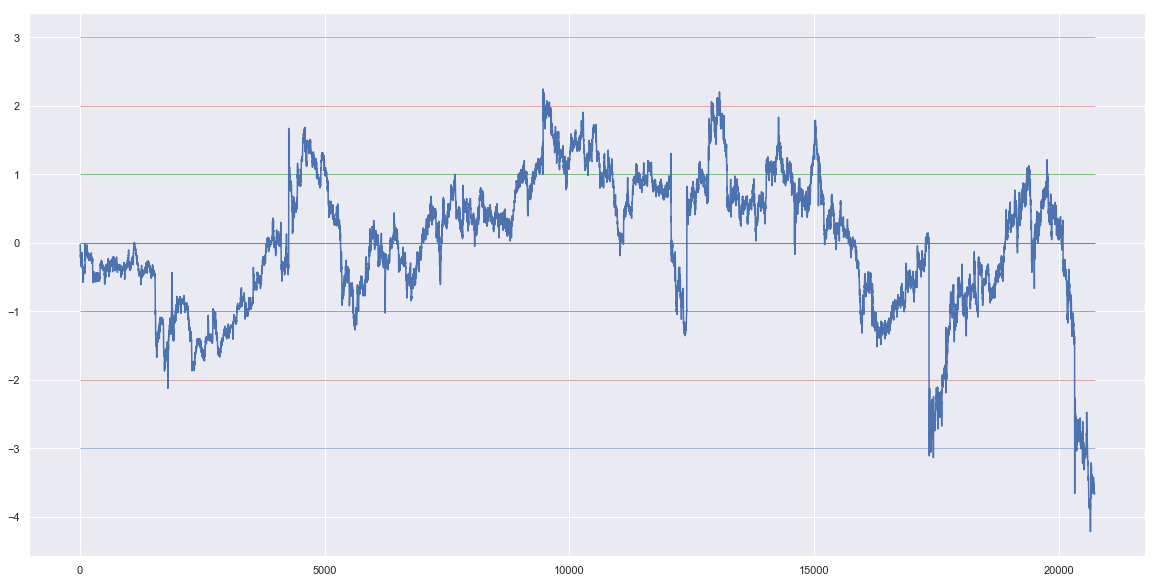

In [113]:
stock_a = 'COUP'
stock_b = 'PTC'
X = stocks_data.loc[:, stock_a].fillna(method='bfill').fillna(method='ffill')
Y = stocks_data.loc[:, stock_b].fillna(method='bfill').fillna(method='ffill')
Xsm = sm.add_constant(X.values)
model = sm.OLS(Y.values, Xsm)
intercept, gamma = model.fit().params
mu = (Y - X * gamma).mean()
residual = (Y - X * gamma) - mu


plt.figure(figsize=(20, 10))
plt.plot(StandardScaler(with_std=True).fit_transform(residual.values.reshape(-1, 1)))
plt.hlines(0, xmin=0, xmax=len(residual), linewidth=0.5, color='black')
plt.hlines(1, xmin=0, xmax=len(residual), linewidth=0.5, color='green')
plt.hlines(-1, xmin=0, xmax=len(residual), linewidth=0.5, color='green')
plt.hlines(2, xmin=0, xmax=len(residual), linewidth=0.5, color='r')
plt.hlines(-2, xmin=0, xmax=len(residual), linewidth=0.5, color='r')
plt.hlines(3, xmin=0, xmax=len(residual), linewidth=0.5, color='b')
plt.hlines(-3, xmin=0, xmax=len(residual), linewidth=0.5, color='b')

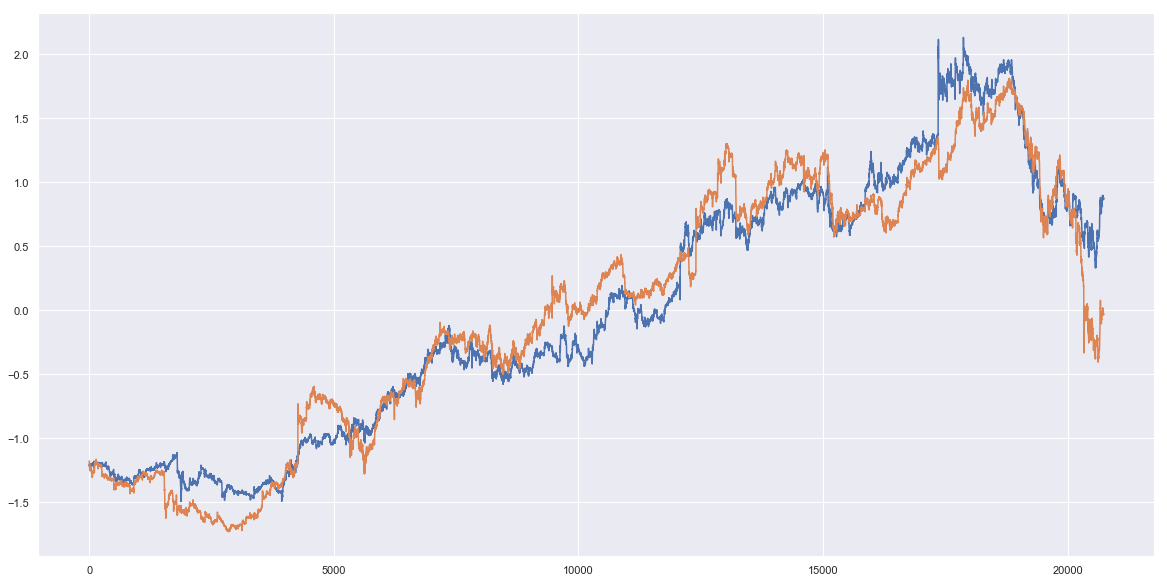

In [114]:
X = stocks_data.loc[:, stock_a].fillna(method='bfill').fillna(method='ffill')
Y = stocks_data.loc[:, stock_b].fillna(method='bfill').fillna(method='ffill')

plt.figure(figsize=(20, 10))
plt.plot(StandardScaler().fit_transform(stocks_data.loc[:, [stock_a, stock_b]].fillna(method='bfill').fillna(method='ffill')))


In [125]:
norm_residual = pd.Series(StandardScaler(with_std=True).fit_transform(residual.values.reshape(-1, 1)).reshape(1, -1)[0])

# Open position when residual goes below +2 (1) std, or above -2 std (2)
# (1) Long A, Short B 
# (2) Short A, Long B

# Close position when residual crosses 0 (nominal), or when > 4 std or < 4 std (stop-loss)

crosses = pd.DataFrame([norm_residual, norm_residual.shift(-1)]).T
crosses['longA_shortB'] = ((crosses[0] > 2) & (crosses[1] < 2))
crosses['shortA_longB'] = ((crosses[0] < -2) & (crosses[1] > -2))
crosses['exit'] = ((crosses[0] < 4) & (crosses[1] > 4)) | ((crosses[0] > -4) & (crosses[1] < -4)) | ((crosses[0] > 0) & (crosses[1] < 0) | (crosses[0] < 0) & (crosses[1] > 0))

crosses = crosses[crosses['longA_shortB'] | crosses['shortA_longB'] | crosses['exit']]
signals = pd.Series()
state = 'closed'
for signal in crosses.iterrows():
    if state == 'closed' and signal[1]['longA_shortB']:
        signals.set_value(signal[0], 'longA_shortB')
        state = 'open'
    elif state == 'closed' and signal[1]['shortA_longB']:
        signals.set_value(signal[0], 'shortA_longB')
        state = 'open'
    elif state == 'open' and signal[1]['exit']:
        signals.set_value(signal[0], 'exit')
        state = 'closed'
    else:
        signals.set_value(signal[0], np.nan)

C:\Users\avialaret\PycharmProjects\AllianzDataset\venv\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\avialaret\PycharmProjects\AllianzDataset\venv\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\avialaret\PycharmProjects\AllianzDataset\venv\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\avialaret\PycharmProjects\AllianzDataset\venv\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


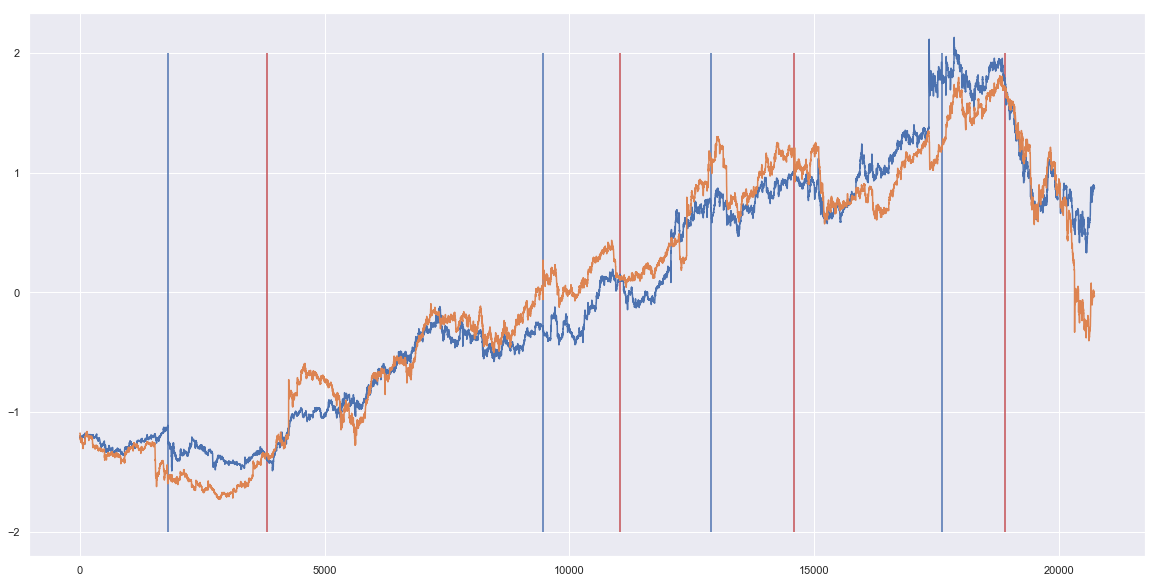

In [120]:
plt.figure(figsize=(20, 10))
plt.plot(StandardScaler().fit_transform(stocks_data.loc[:, [stock_a, stock_b]].fillna(method='bfill').fillna(method='ffill')))
for index, signal in signals.dropna().items():
    if signal == 'exit':
        plt.vlines(index, -2, 2, colors='r')
    else:
        plt.vlines(index, -2, 2, colors='b')

In [121]:
orders = stocks_data.loc[:, [stock_a, stock_b]].fillna(method='bfill').fillna(method='ffill').reset_index(drop=True)
orders.columns = ['A', 'B']
orders['orders'] = signals
orders = orders.dropna().reset_index(drop=True)
orders

,A,B,orders
0,36.36,61.66,shortA_longB
1,32.39,64.55,exit
2,48.28,86.48,longA_shortB
3,53.94,84.49,exit
4,61.06,97.53,longA_shortB
5,66.91,98.51,exit
6,77.72,99.60,shortA_longB
7,77.42,105.74,exit


In [122]:
positions = pd.DataFrame(columns=['Position', 'PriceIn', 'PriceOut', 'Profit'])
for i in range(0, len(orders)//2*2, 2):
    price_in_a = orders.iloc[i]['A']
    price_out_a = orders.iloc[i+1]['A']
    position_a = -1 if orders.iloc[i]['orders'] == 'shortA_longB' else 1
    profit_a = 1 - price_out_a / price_in_a if orders.iloc[i]['orders'] == 'shortA_longB' else price_out_a / price_in_a - 1
    positions = positions.append(pd.DataFrame([[position_a, price_in_a, price_out_a, profit_a]], columns=['Position', 'PriceIn', 'PriceOut', 'Profit']))
    
    price_in_b = orders.iloc[i]['B']
    price_out_b = orders.iloc[i+1]['B']
    position_b = -1 if orders.iloc[i]['orders'] == 'longA_shortB' else 1
    profit_b = price_out_b / price_in_b - 1 if orders.iloc[i]['orders'] == 'shortA_longB' else 1 - price_out_b / price_in_b
    positions = positions.append(pd.DataFrame([[position_b, price_in_b, price_out_b, profit_b]], columns=['Position', 'PriceIn', 'PriceOut', 'Profit']))

print(positions['Profit'].sum())
positions

0.4475655688185396


,Position,PriceIn,PriceOut,Profit
0,-1,36.36,32.39,0.109186
0,1,61.66,64.55,0.046870
0,1,48.28,53.94,0.117233
0,-1,86.48,84.49,0.023011
0,1,61.06,66.91,0.095807
0,-1,97.53,98.51,-0.010048
0,-1,77.72,77.42,0.003860
0,1,99.60,105.74,0.061647


C:\Users\avialaret\PycharmProjects\AllianzDataset\venv\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\avialaret\PycharmProjects\AllianzDataset\venv\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\avialaret\PycharmProjects\AllianzDataset\venv\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


1.9575154980509257


C:\Users\avialaret\PycharmProjects\AllianzDataset\venv\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,Position,PriceIn,PriceOut,Profit
0,1,19.34,43.58,1.253361
0,-1,16.34,11.11,0.320073
0,-1,51.09,38.68,0.242905
0,1,9.35,10.67,0.141176


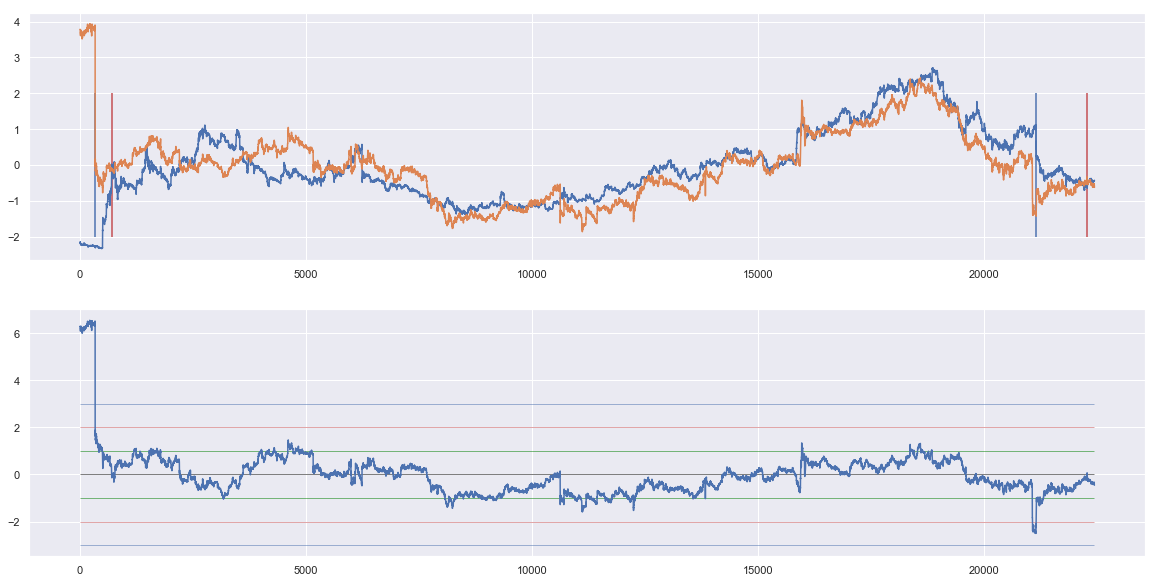

In [10]:
stock_a = 'ROKU'
stock_b = 'TRUE'

X = stocks_data.loc[:, stock_a].fillna(method='bfill').fillna(method='ffill')
Y = stocks_data.loc[:, stock_b].fillna(method='bfill').fillna(method='ffill')
Xsm = sm.add_constant(X.values)
model = sm.OLS(Y.values, Xsm)
intercept, gamma = model.fit().params
mu = (Y - X * gamma).mean()
residual = (Y - X * gamma) - mu

norm_residual = pd.Series(StandardScaler(with_std=True).fit_transform(residual.values.reshape(-1, 1)).reshape(1, -1)[0])

# Open position when residual goes below +2 (1) std, or above -2 std (2)
# (1) Long A, Short B 
# (2) Short A, Long B

# Close position when residual crosses 0 (nominal), or when > 4 std or < 4 std (stop-loss)

crosses = pd.DataFrame([norm_residual, norm_residual.shift(-1)]).T
crosses['longA_shortB'] = ((crosses[0] > 2) & (crosses[1] < 2))
crosses['shortA_longB'] = ((crosses[0] < -2) & (crosses[1] > -2))
crosses['exit'] = ((crosses[0] < 4) & (crosses[1] > 4)) | ((crosses[0] > -4) & (crosses[1] < -4)) | ((crosses[0] > 0) & (crosses[1] < 0) | (crosses[0] < 0) & (crosses[1] > 0))

crosses = crosses[crosses['longA_shortB'] | crosses['shortA_longB'] | crosses['exit']]
signals = pd.Series()
state = 'closed'
for signal in crosses.iterrows():
    if state == 'closed' and signal[1]['longA_shortB']:
        signals.set_value(signal[0], 'longA_shortB')
        state = 'open'
    elif state == 'closed' and signal[1]['shortA_longB']:
        signals.set_value(signal[0], 'shortA_longB')
        state = 'open'
    elif state == 'open' and signal[1]['exit']:
        signals.set_value(signal[0], 'exit')
        state = 'closed'
    else:
        signals.set_value(signal[0], np.nan)
        
orders = stocks_data.loc[:, [stock_a, stock_b]].fillna(method='bfill').fillna(method='ffill').reset_index(drop=True)
orders.columns = ['A', 'B']
orders['orders'] = signals
orders = orders.dropna().reset_index(drop=True)

positions = pd.DataFrame(columns=['Position', 'PriceIn', 'PriceOut', 'Profit'])
for i in range(0, len(orders)//2*2, 2):
    price_in_a = orders.iloc[i]['A']
    price_out_a = orders.iloc[i+1]['A']
    position_a = -1 if orders.iloc[i]['orders'] == 'shortA_longB' else 1
    profit_a = 1 - price_out_a / price_in_a if orders.iloc[i]['orders'] == 'shortA_longB' else price_out_a / price_in_a - 1
    positions = positions.append(pd.DataFrame([[position_a, price_in_a, price_out_a, profit_a]], columns=['Position', 'PriceIn', 'PriceOut', 'Profit']))
    
    price_in_b = orders.iloc[i]['B']
    price_out_b = orders.iloc[i+1]['B']
    position_b = -1 if orders.iloc[i]['orders'] == 'longA_shortB' else 1
    profit_b = price_out_b / price_in_b - 1 if orders.iloc[i]['orders'] == 'shortA_longB' else 1 - price_out_b / price_in_b
    positions = positions.append(pd.DataFrame([[position_b, price_in_b, price_out_b, profit_b]], columns=['Position', 'PriceIn', 'PriceOut', 'Profit']))
    

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
ax2.plot(StandardScaler(with_std=True).fit_transform(residual.values.reshape(-1, 1)))
ax2.hlines(0, xmin=0, xmax=len(residual), linewidth=0.5, color='black')
ax2.hlines(1, xmin=0, xmax=len(residual), linewidth=0.5, color='green')
ax2.hlines(-1, xmin=0, xmax=len(residual), linewidth=0.5, color='green')
ax2.hlines(2, xmin=0, xmax=len(residual), linewidth=0.5, color='r')
ax2.hlines(-2, xmin=0, xmax=len(residual), linewidth=0.5, color='r')
ax2.hlines(3, xmin=0, xmax=len(residual), linewidth=0.5, color='b')
ax2.hlines(-3, xmin=0, xmax=len(residual), linewidth=0.5, color='b')

ax1.plot(StandardScaler().fit_transform(stocks_data.loc[:, [stock_a, stock_b]].fillna(method='bfill').fillna(method='ffill')))
for index, signal in signals.dropna().items():
    if signal == 'exit':
        ax1.vlines(index, -2, 2, colors='r')
    else:
        ax1.vlines(index, -2, 2, colors='b')

print(positions['Profit'].sum())
positions